<a href="https://colab.research.google.com/github/KashishTiwari-17/HeartDiseasePrediction/blob/main/ml_project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/heart desease dataset.csv")

In [ ]:
# Show basic info and the first few rows
df.info(), df.head(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


(None,
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   52    1   0       125   212    0        1      168      0      1.0      2   
 1   53    1   0       140   203    1        0      155      1      3.1      0   
 2   70    1   0       145   174    0        1      125      1      2.6      0   
 3   61    1   0       148   203    0        1      161      0      0.0      2   
 4   62    0   0       138   294    1        1      106      0      1.9      1   
 
    ca  thal  target  
 0   2     3       0  
 1   0     3       0  
 2   0     3       0  
 3   1     3       0  
 4   3     2       0  ,
                age          sex           cp     trestbps        chol  \
 count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
 mean     54.434146     0.695610     0.942439   131.611707   246.00000   
 std       9.072290     0.460373     1.029641    17.516718    51.59251   
 min      29.000000     0.000000     0.000000    94.000000   126

In [ ]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Check class distribution in the target variable
df['target'].value_counts(normalize=True) * 100

,proportion
target,
1,51.317073
0,48.682927


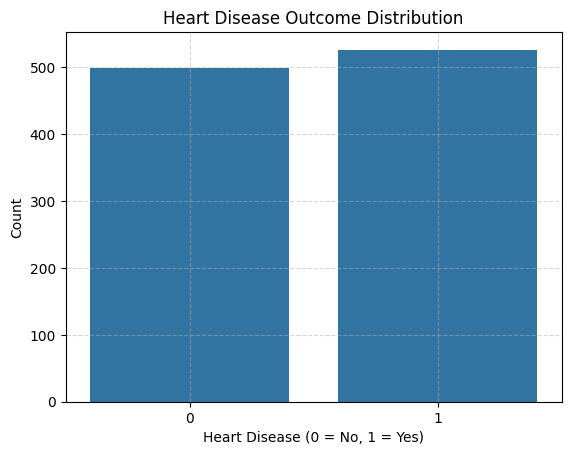

In [ ]:
# Plot the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Heart Disease Outcome Distribution')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
df.corr()['target'].sort_values(ascending=False)

,target
target,1.000000
cp,0.434854
thalach,0.422895
slope,0.345512
restecg,0.134468
fbs,-0.041164
chol,-0.099966
trestbps,-0.138772
age,-0.229324
sex,-0.279501


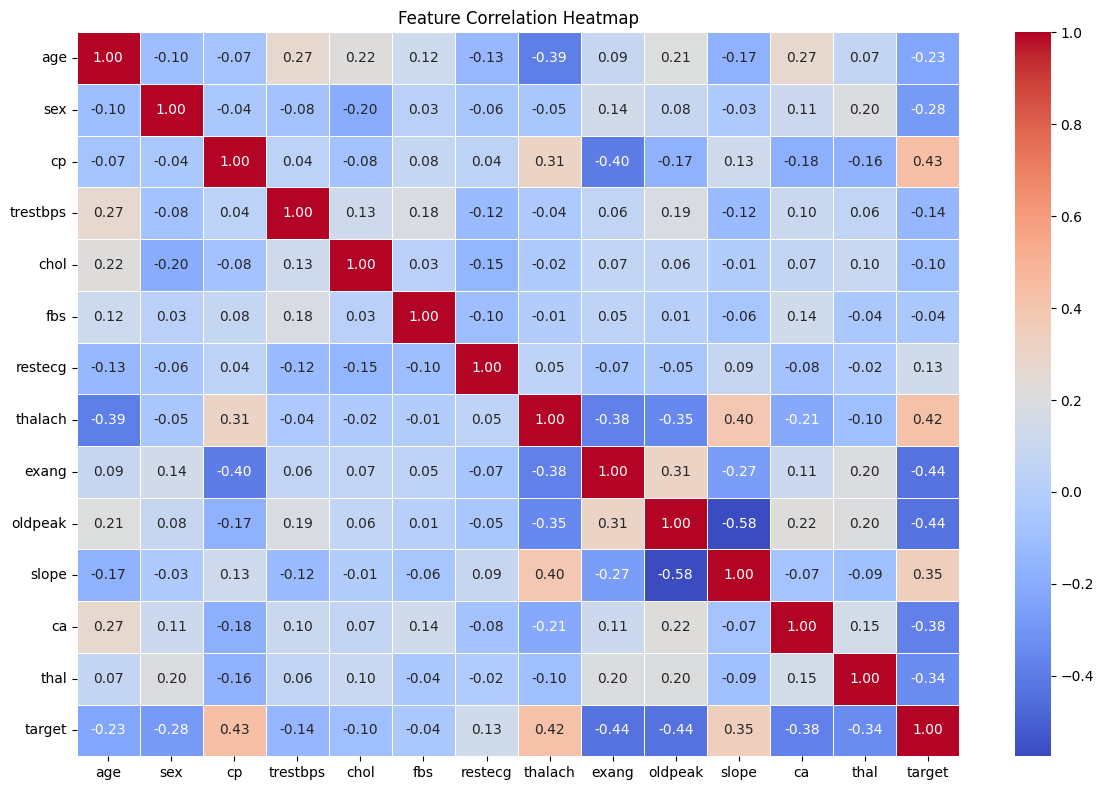

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


In [ ]:
# Features and target
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [ ]:
#Train & Evaluate Each Model
conf_matrices = {}  # Initialize conf_matrices as a dictionary
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    cm = confusion_matrix(y_test, y_pred)  # Get confusion matrix
    conf_matrices[name] = cm  # Save for visualization

    # Print evaluation metrics
    print(f"\n{name} Metrics:")
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:\n", cm)


Logistic Regression Metrics:
Accuracy:  0.7951
Precision: 0.7563
Recall:    0.8738
F1 Score:  0.8108
Confusion Matrix:
 [[73 29]
 [13 90]]

Random Forest Metrics:
Accuracy:  0.9854
Precision: 1.0000
Recall:    0.9709
F1 Score:  0.9852
Confusion Matrix:
 [[102   0]
 [  3 100]]


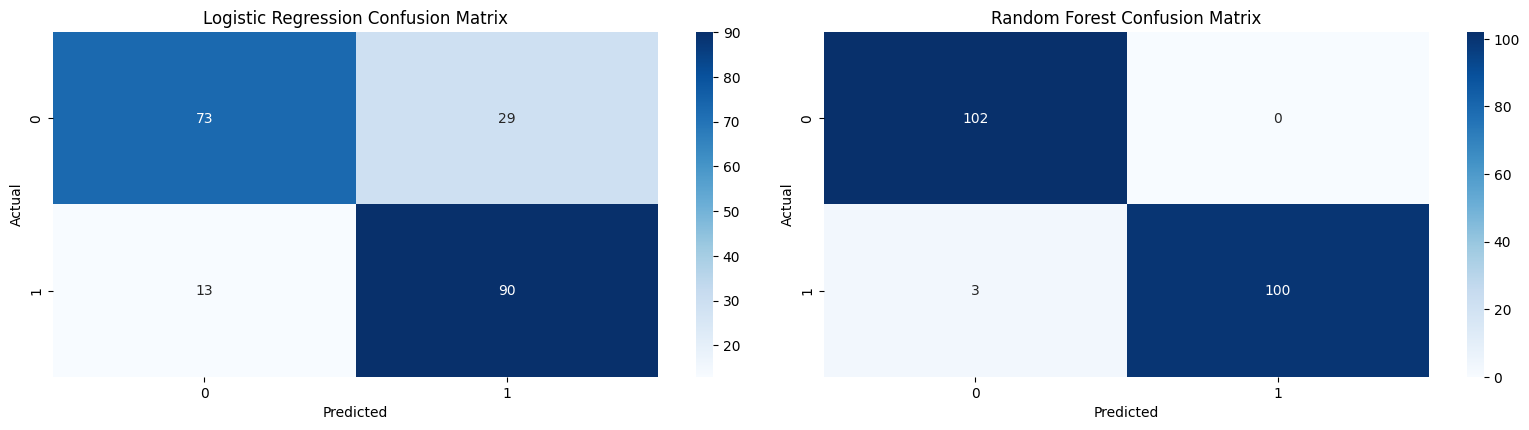

In [ ]:
#Visualize Confusion Matrices
plt.figure(figsize=(16, 8))
for i, (name, cm) in enumerate(conf_matrices.items()):
    plt.subplot(2, 2, i + 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()